<a href="https://colab.research.google.com/github/long945/DataAnalyze/blob/main/HocSauLab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HOMEWORK LAB 04**

Dữ liệu mô tả: Vụ đắm tàu ​​Titanic là một trong những vụ đắm tàu ​​khét tiếng nhất trong lịch sử. Vào ngày 15 tháng 4 năm 1912, trong chuyến đi đầu tiên của mình, tàu Titanic ―unsinkable‖ RMS được nhiều người coi là đã chìm sau khi va chạm với một tảng băng trôi. Thật không may, không có đủ thuyền cứu sinh cho tất cả mọi người trên tàu, dẫn đến cái chết của 1502 trong số 2224 hành khách và phi hành đoàn. Mặc dù có một số yếu tố may mắn liên quan đến việc sống sót, nhưng có vẻ như một số nhóm người có khả năng sống sót cao hơn những nhóm khác .



**BÀI LÀM**


**PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING**


1.Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.


2.Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked


3.Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name

4.Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F

5.Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass). Ta tiến hành làm các bước sau

6.Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older


7.Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi ―secondName 

8.Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch


9.Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.


10.Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown

In [1]:

import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt

1. Viết hàm load_data() để tải dữ liệu lên ứng dụng.Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.

In [2]:
def load_data(filename):
  return pd.read_csv('https://raw.githubusercontent.com/huynhhoc/DataAnalystDeepLearning/main/Data/'+filename)
df = load_data('titanic_disaster.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



2. Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

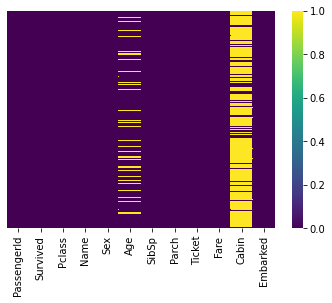

In [3]:
sns.heatmap(df.isna(), 
            yticklabels=False, 
            cbar=True, 
            cmap='viridis')

Nhận xét:Tình trạng thiếu dữ liệu Age, Cabin và Embarked

    Embarked: đủ dữ liệu


    Age, Cabin: không đủ dữ liệu(Age < Cabin)

3. Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName.

In [4]:
df[['firstName', 'secondName']]=df['Name'].str.split(',',expand = True)

In [5]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [6]:
df = df.drop('Name',axis=1)
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


4. Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F

In [7]:
Sex = df['Sex']
for i in range(len(Sex)):
  if  Sex[i] == 'male':
    df.Sex[i] = 'M'
  if  Sex[i] == 'female':
    df.Sex[i] = 'F'
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


5. Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi: Hãy đưa ra quyết định dùng giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass).

..Ta tiến hành làm các bước sau:

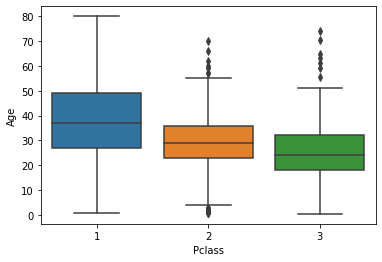

In [8]:
sns.boxplot(y='Age', x='Pclass', data = df)

In [9]:
df['Age'].fillna(df['Age'].mean(), inplace =True)
 
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName
0,1,0,3,M,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.000000,0,0,211536,13.0000,NaN,S,Montvila,Rev. Juozas
887,888,1,1,F,19.000000,0,0,112053,30.0000,B42,S,Graham,Miss. Margaret Edith
888,889,0,3,F,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Miss. Catherine Helen ""Carrie"""
889,890,1,1,M,26.000000,0,0,111369,30.0000,C148,C,Behr,Mr. Karl Howell


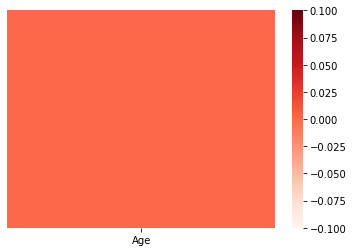

In [10]:
sns.heatmap(df[['Age']].isna(), cmap = 'Reds', yticklabels= False)


6. Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older

In [11]:
for i in df['Age']:
  df.loc[(df['Age'] <=  12), 'Agegroup'] ='Kid'
  df.loc[(df['Age'] > 12) & (df['Age'] <= 18), 'Agegroup'] ='Teen'
  df.loc[(df['Age'] > 18) & (df['Age'] <= 60), 'Agegroup'] ='Adult'
  df.loc[(df['Age'] > 60), 'Agegroup'] ='Older'
df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup
0,1,0,3,M,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,M,29.699118,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult
6,7,0,1,M,54.000000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,M,2.000000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,F,27.000000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,F,14.000000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


7. Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr, Mrs, Miss, Master ra khỏi ―secondName

In [12]:
df[['namePrefix','secondName' ]] =df['secondName'].str.split('. ',1,expand = True)

In [13]:
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr


8. Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch

In [14]:
df['familySize'] = 1+df.SibSp+df.Parch

In [15]:

df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr,2
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs,2
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs,2
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr,1


9. Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.

In [16]:
for i in df['familySize']:
  df.loc[(df['familySize'] ==  0), 'Alone'] = 1
  df.loc[(df['familySize'] !=  0), 'Alone'] = 0
df.Alone

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
886    0.0
887    0.0
888    0.0
889    0.0
890    0.0
Name: Alone, Length: 891, dtype: float64

10. Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown

In [17]:
df['typeCabin']= None
Cabin= df.Cabin
for i in range(len(Cabin)):
  if pd.isna(df.Cabin[i]) == True:
    df['typeCabin'][i]= '―Unknown'
  else:
    df['typeCabin'][i]= df.Cabin[i][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [18]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,firstName,secondName,Agegroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Adult,Mr,2,0.0,―Unknown
1,2,1,1,F,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0.0,C
2,3,1,3,F,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Adult,Miss,1,0.0,―Unknown
3,4,1,1,F,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Adult,Mrs,2,0.0,C
4,5,0,3,M,35.000000,0,0,373450,8.0500,NaN,S,Allen,William Henry,Adult,Mr,1,0.0,―Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,M,27.000000,0,0,211536,13.0000,NaN,S,Montvila,Juozas,Adult,Rev,1,0.0,―Unknown
887,888,1,1,F,19.000000,0,0,112053,30.0000,B42,S,Graham,Margaret Edith,Adult,Miss,1,0.0,B
888,889,0,3,F,29.699118,1,2,W./C. 6607,23.4500,NaN,S,Johnston,"Catherine Helen ""Carrie""",Adult,Miss,4,0.0,―Unknown
889,890,1,1,M,26.000000,0,0,111369,30.0000,C148,C,Behr,Karl Howell,Adult,Mr,1,0.0,C


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA


1.Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng (Survived) trên từng nhóm giới tính (Sex).


2.Trực quan thông tin hành khách sống sót (Survived) trên từng nhóm phân loại hành khách (Pclass).


3.Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác (Agegroup)


4.Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm (familySize)đi cùng


5.Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé (Fare)


6.Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến (Embarked).


1. Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng (Survived) trên từng nhóm giới tính (Sex).

In [19]:
Sur_Sex= df.groupby(['Survived', 'Sex'])[['Survived']].count()
Sur_Sex

Survived
Survived Sex          
0        F          81
         M         468
1        F         233
         M         109

In [20]:
unstackSur_Sex = Sur_Sex.unstack()
unstackSur_Sex

Survived     
Sex             F    M
Survived              
0              81  468
1             233  109

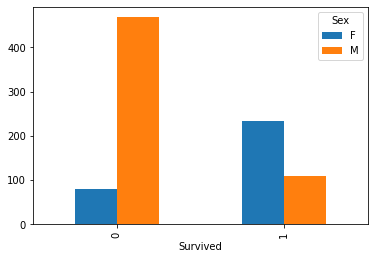

In [21]:
unstackSur_Sex['Survived'].plot.bar()

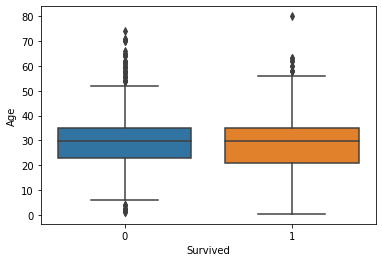

In [22]:
sns.boxplot(y='Age', x='Survived', data = df)

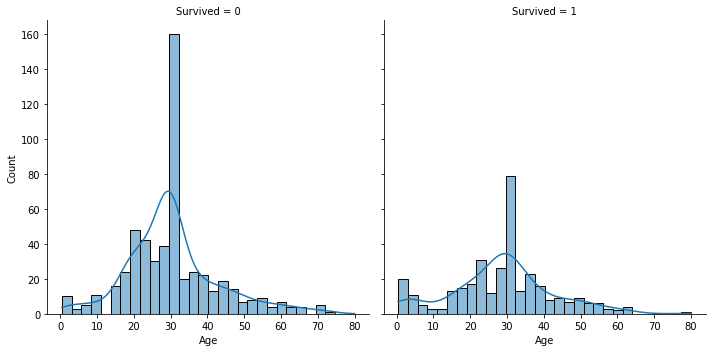

In [23]:
sns.displot(df, x="Age", col="Survived", kde=True)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


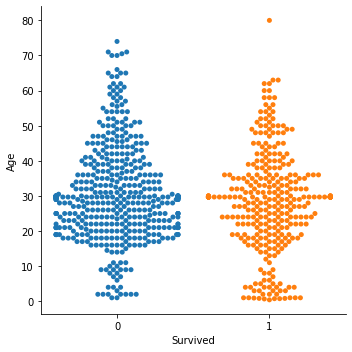

In [24]:
sns.catplot(x="Survived", y="Age", kind="swarm",data=df)


2. Trực quan thông tin hành khách sống sót (Survived) trên từng nhóm phân loại hành khách (Pclass).

In [25]:
Sur_Pclass= df.groupby(['Survived', 'Pclass'])[['Survived']].count()
Sur_Pclass

Survived
Survived Pclass          
0        1             80
         2             97
         3            372
1        1            136
         2             87
         3            119

In [26]:
unstackSur_Pclass = Sur_Pclass.unstack()
unstackSur_Pclass

Survived         
Pclass          1   2    3
Survived                  
0              80  97  372
1             136  87  119

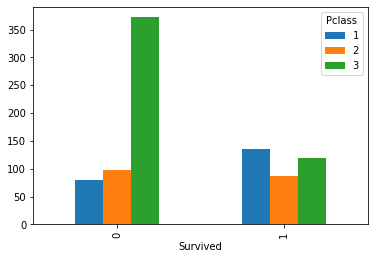

In [27]:
unstackSur_Pclass['Survived'].plot.bar()

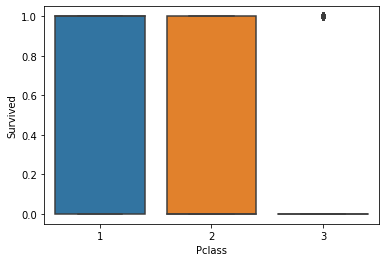

In [28]:
sns.boxplot(y='Survived', x='Pclass', data = df)

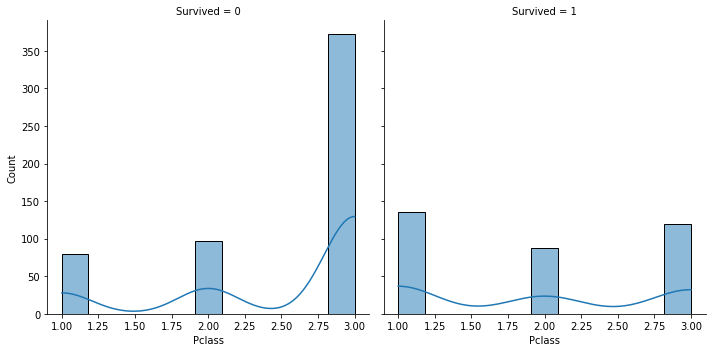

In [29]:
sns.displot(df, x="Pclass", col="Survived", kde=True)

3. Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác (Agegroup)

In [30]:
Sur_Sex_Agegroup= df.groupby(['Survived', 'Sex','Agegroup'])[['Survived']].count()
Sur_Sex_Agegroup

Survived
Survived Sex Agegroup          
0        F   Adult           59
             Kid             13
             Teen             9
         M   Adult          404
             Kid             16
             Older           17
             Teen            31
1        F   Adult          184
             Kid             19
             Older            3
             Teen            27
         M   Adult           83
             Kid             21
             Older            2
             Teen             3

In [31]:
unstackSur_Sex_Agegroup = Sur_Sex_Agegroup.unstack()
unstackSur_Sex_Agegroup

Survived                  
Agegroup        Adult   Kid Older  Teen
Survived Sex                           
0        F       59.0  13.0   NaN   9.0
         M      404.0  16.0  17.0  31.0
1        F      184.0  19.0   3.0  27.0
         M       83.0  21.0   2.0   3.0

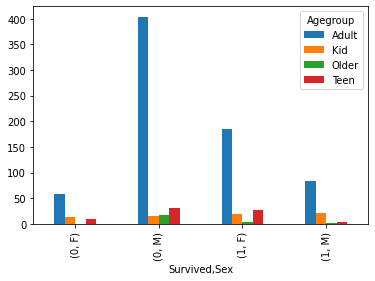

In [32]:
unstackSur_Sex_Agegroup['Survived'].plot.bar()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


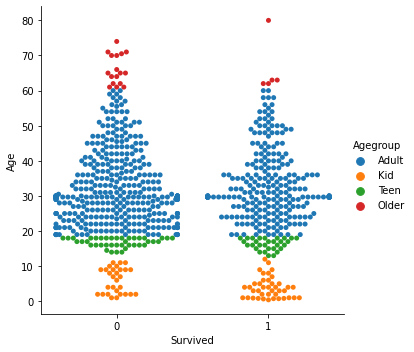

In [33]:
sns.catplot(x="Survived", y="Age", hue='Agegroup', kind="swarm",data=df)

4. Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm (familySize)đi cùng

In [34]:
Sur_familySize= df.groupby(['Survived', 'familySize'])[['Survived']].count()
unstackSur_familySize = Sur_familySize.unstack()
unstackSur_familySize

Survived                                             
familySize       1     2     3     4     5     6    7    8    11
Survived                                                        
0             374.0  72.0  43.0   8.0  12.0  19.0  8.0  6.0  7.0
1             163.0  89.0  59.0  21.0   3.0   3.0  4.0  NaN  NaN

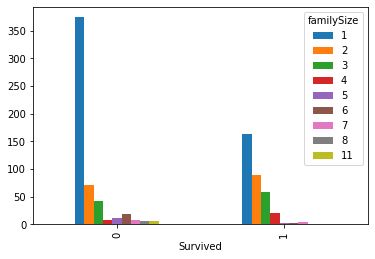

In [35]:

unstackSur_familySize['Survived'].plot.bar()

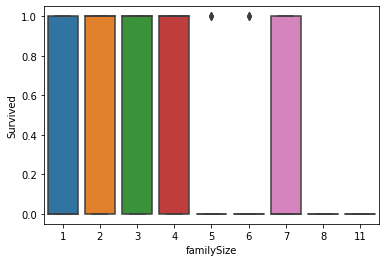

In [36]:
sns.boxplot(y='Survived', x='familySize', data = df)

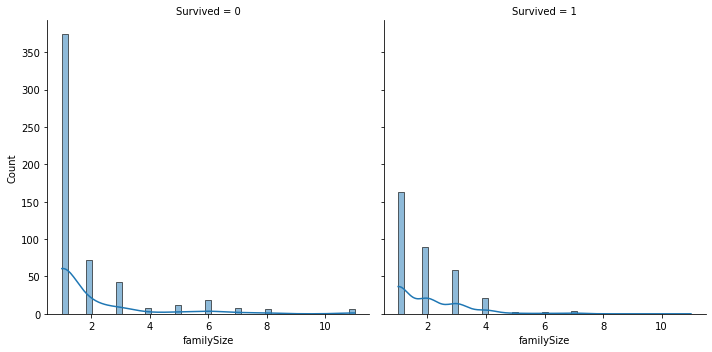

In [37]:
sns.displot(df, x="familySize", col="Survived", kde=True)